In [19]:
import pandas as pd
import numpy as np

# 1. LOAD DATA (semicolon delimiter for AQI dataset)
aqi_df = pd.read_csv(r'C:\Users\mohsi\Downloads\openaq.csv', sep=';')
traffic_df = pd.read_csv(r'C:\Users\mohsi\Downloads\trafficDS.csv')  # comma delimited

# --------------------------
# 2. ANALYZE AQI DATASET
# --------------------------
print("📊 AQI Dataset Info:")
print(aqi_df.info())
print("\n🔍 Missing values in AQI:")
print(aqi_df.isnull().sum())

print("\n🔁 Duplicate rows in AQI:", aqi_df.duplicated().sum())


📊 AQI Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61177 entries, 0 to 61176
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Code   61177 non-null  object 
 1   City           32031 non-null  object 
 2   Location       61175 non-null  object 
 3   Coordinates    61107 non-null  object 
 4   Pollutant      61177 non-null  object 
 5   Source Name    61177 non-null  object 
 6   Unit           61177 non-null  object 
 7   Value          61177 non-null  float64
 8   Last Updated   61177 non-null  object 
 9   Country Label  61050 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.7+ MB
None

🔍 Missing values in AQI:
Country Code         0
City             29146
Location             2
Coordinates         70
Pollutant            0
Source Name          0
Unit                 0
Value                0
Last Updated         0
Country Label      127
dtype: int64

🔁 Duplicate rows

In [20]:

print("\n📊 Traffic Dataset Info:")
print(traffic_df.info())
print("\n🔍 Missing values in Traffic:")
print(traffic_df.isnull().sum())

print("\n🔁 Duplicate rows in Traffic:", traffic_df.duplicated().sum())


📊 Traffic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       100446

In [21]:
# 4. CLEAN AQI DATASET
# --------------------------
# Drop rows with missing coordinates or city
aqi_df = aqi_df.dropna(subset=['Coordinates', 'City'])

# Remove rows with invalid pollutant values (e.g. -1.0 or NaN)
aqi_df = aqi_df[aqi_df['Value'] >= 0]

# Parse date
aqi_df['Last Updated'] = pd.to_datetime(aqi_df['Last Updated'], errors='coerce')
aqi_df = aqi_df.dropna(subset=['Last Updated'])

# Standardize city names
aqi_df['City'] = aqi_df['City'].str.lower().str.strip()

# Extract date for merging
aqi_df['Date'] = aqi_df['Last Updated'].dt.date

In [22]:
# 5. CLEAN TRAFFIC DATASET
# --------------------------
# Parse dates
traffic_df['UpdateTimeUTC'] = pd.to_datetime(traffic_df['UpdateTimeUTC'], errors='coerce')
traffic_df = traffic_df.dropna(subset=['UpdateTimeUTC'])

# Standardize city names
traffic_df['City'] = traffic_df['City'].str.lower().str.strip()

# Extract date
traffic_df['Date'] = traffic_df['UpdateTimeUTC'].dt.date

# Drop duplicates if any
traffic_df = traffic_df.drop_duplicates()


In [23]:
merged_df = pd.merge(aqi_df, traffic_df, on=['City', 'Date'], how='inner')

In [24]:
# 7. FINAL CLEANING & SELECTION
# --------------------------
# Select relevant columns
final_df = merged_df[[
    'City', 'Date', 'Pollutant', 'Value', 'Unit',
    'JamsDelay', 'TrafficIndexLive', 'JamsLengthInKms', 'JamsCount',
    'TravelTimeLivePer10KmsMins', 'MinsDelay'
]]

# Rename for clarity
final_df = final_df.rename(columns={
    'Value': 'PollutionValue',
    'Unit': 'PollutionUnit'
})

# --------------------------
# 8. EXPORT TO CSV
# --------------------------
final_df.to_csv('merged_traffic_aqi_data.csv', index=False)
print("\n✅ Data successfully cleaned and merged! File saved as: merged_traffic_aqi_data.csv")

# Preview final dataset
print("\n🧾 Sample of merged dataset:")
print(final_df.head())


✅ Data successfully cleaned and merged! File saved as: merged_traffic_aqi_data.csv

🧾 Sample of merged dataset:
        City        Date Pollutant  PollutionValue PollutionUnit  JamsDelay  \
0  melbourne  2025-01-08     PM2.5             7.1         µg/m³      206.3   
1  melbourne  2025-01-08     PM2.5             7.1         µg/m³      107.0   
2  melbourne  2025-01-08     PM2.5             7.1         µg/m³      162.5   
3  melbourne  2025-01-08     PM2.5             7.1         µg/m³      112.1   
4  melbourne  2025-01-08     PM2.5             7.1         µg/m³       22.0   

   TrafficIndexLive  JamsLengthInKms  JamsCount  TravelTimeLivePer10KmsMins  \
0              24.0             29.9       62.0                   14.579338   
1              25.0             25.2       41.0                   14.722251   
2              25.0             37.9       55.0                   14.538101   
3              17.0             24.6       38.0                   13.169364   
4               6

In [25]:
## !pip install seaborn matplotlib

['City', 'Date', 'Pollutant', 'PollutionValue', 'PollutionUnit', 'JamsDelay', 'TrafficIndexLive', 'JamsLengthInKms', 'JamsCount', 'TravelTimeLivePer10KmsMins', 'MinsDelay']


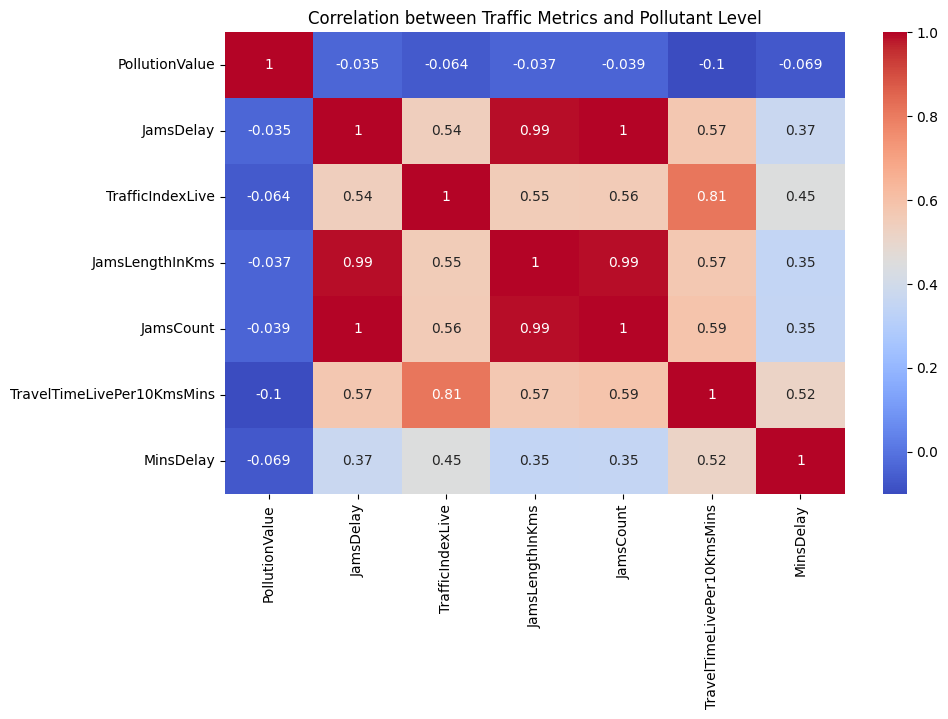

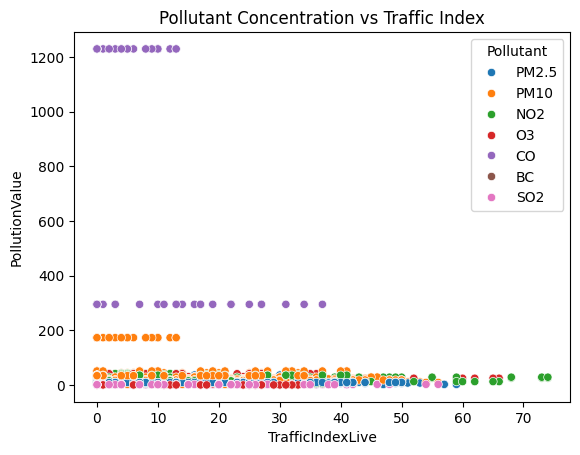

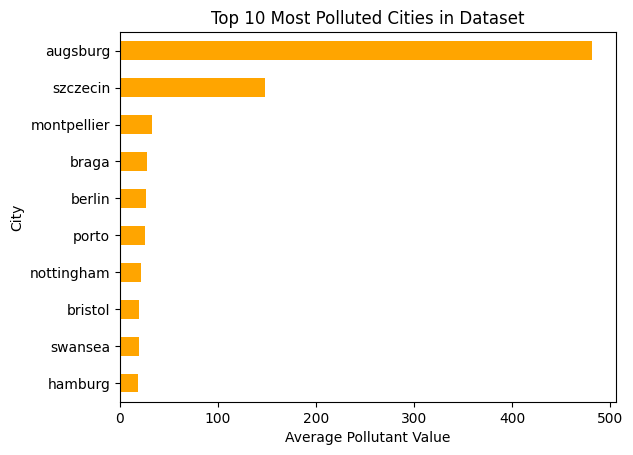

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


# Load final merged dataset
df = final_df
print(final_df.columns.tolist())


# 1. Correlation Heatmap between traffic features and pollutant value
plt.figure(figsize=(10, 6))
sns.heatmap(final_df[['PollutionValue', 'JamsDelay', 'TrafficIndexLive', 'JamsLengthInKms', 'JamsCount',
                'TravelTimeLivePer10KmsMins', 'MinsDelay']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Traffic Metrics and Pollutant Level")
plt.show()

# 2. Scatterplot: Traffic Index vs Pollutant Concentration
sns.scatterplot(data=final_df, x='TrafficIndexLive', y='PollutionValue', hue='Pollutant')
plt.title("Pollutant Concentration vs Traffic Index")
plt.show()

# 3. Average pollutant per city
pollution_by_city = df.groupby("City")["PollutionValue"].mean().sort_values(ascending=False)
pollution_by_city.head(10).plot(kind='barh', color='orange')
plt.xlabel("Average Pollutant Value")
plt.title("Top 10 Most Polluted Cities in Dataset")
plt.gca().invert_yaxis()
plt.show()
